## CIFAR DATASET
### The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

## Imports Needed

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

import numpy as np
import time

# Download Dataset

In [2]:
import cifar10

In [3]:
cifar10.data_path = "data/CIFAR-10/"
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [4]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [6]:
images_train.shape

(50000, 32, 32, 3)

In [7]:
cls_train.shape

(50000,)

In [8]:
labels_train.shape

(50000, 10)

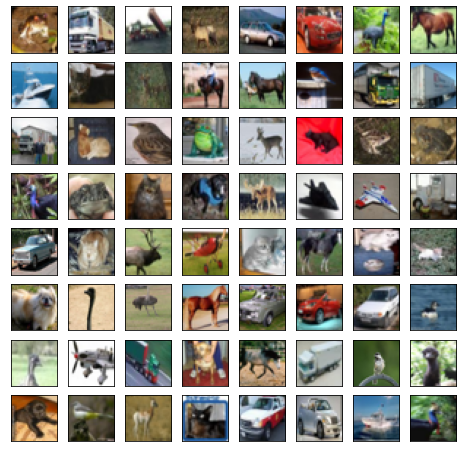

In [9]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    axes = fig.add_subplot(8,8,i+1)
    axes.imshow(images_train[i])
    axes.set_xticks([])
    axes.set_yticks([])
plt.show()

In [10]:
x_train = images_train.reshape((50000, 3072))
x_test  = images_test.reshape((10000, 3072))

### Apply PCA

In [11]:
pca = PCA()
pca.fit(x_train)

PCA()

In [12]:
k=0
total=0
while total<0.99:
    total += pca.explained_variance_ratio_[k]
    k += 1
k

217

In [13]:
pca = PCA(n_components=k)

In [14]:
x_transformed = pca.fit_transform(x_train)

In [15]:
x_transformed.shape

(50000, 217)

In [16]:
pca.components_.shape

(217, 3072)

### Get back data

In [17]:
x_approx = pca.inverse_transform(x_transformed)

In [18]:
x_approx = x_approx.reshape((50000, 32, 32, 3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

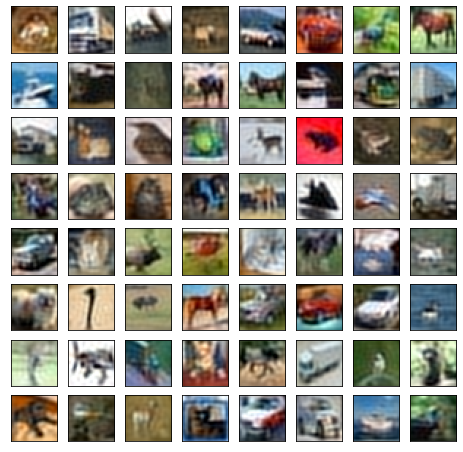

In [19]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    axes = fig.add_subplot(8,8,i+1)
    axes.imshow(x_approx[i])
    axes.set_xticks([])
    axes.set_yticks([])
plt.show()

### Plot eigenFaces

In [20]:
eigenv = pca.components_
eigenFaces = eigenv.reshape((k,32,32,3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

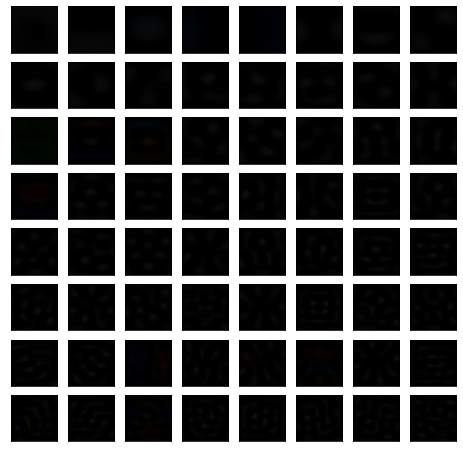

In [21]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    axes = fig.add_subplot(8,8,i+1)
    axes.imshow(eigenFaces[i])
    axes.set_xticks([])
    axes.set_yticks([])
plt.show()

### Use classification algorithm

In [22]:
x_train_pca = x_transformed
x_test_pca = pca.fit_transform(x_test)

## RandomForest

In [23]:
clf = RandomForestClassifier()

In [24]:
clf.fit(x_train_pca, cls_train)

RandomForestClassifier()

In [25]:
y_pred = clf.predict(x_test_pca)

#### Classification_report

In [27]:
print(classification_report(cls_test, y_pred))

              precision    recall  f1-score   support

           0       0.27      0.30      0.29      1000
           1       0.24      0.26      0.25      1000
           2       0.19      0.16      0.17      1000
           3       0.18      0.15      0.16      1000
           4       0.29      0.33      0.31      1000
           5       0.25      0.24      0.25      1000
           6       0.19      0.17      0.18      1000
           7       0.13      0.10      0.12      1000
           8       0.33      0.40      0.36      1000
           9       0.29      0.32      0.31      1000

    accuracy                           0.24     10000
   macro avg       0.24      0.24      0.24     10000
weighted avg       0.24      0.24      0.24     10000



In [31]:
clf.score(x_test_pca, cls_test)

0.2443

### Score is very bad. So we try another algo like SVM

In [33]:
svm = SVC(kernel='rbf', gamma='auto')

In [34]:
svm.fit(x_train_pca, cls_train)

SVC(gamma='auto')

In [35]:
y_pred = svm.predict(x_test_pca)

In [37]:
print(classification_report(cls_test, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.27      0.26      1000
           1       0.24      0.23      0.24      1000
           2       0.23      0.25      0.24      1000
           3       0.16      0.17      0.17      1000
           4       0.25      0.26      0.25      1000
           5       0.29      0.24      0.27      1000
           6       0.23      0.23      0.23      1000
           7       0.10      0.08      0.09      1000
           8       0.29      0.34      0.32      1000
           9       0.28      0.30      0.29      1000

    accuracy                           0.24     10000
   macro avg       0.23      0.24      0.23     10000
weighted avg       0.23      0.24      0.23     10000



### We want to store names insteadof numbers

In [38]:
y_pred_names = []
for num in y_pred:
    y_pred_names.append(class_names[num])

In [40]:
y_pred_names = np.array(y_pred_names)
y_pred_names.reshape(-1,1)

array([['automobile'],
       ['truck'],
       ['ship'],
       ...,
       ['dog'],
       ['frog'],
       ['frog']], dtype='<U10')

In [42]:
np.savetxt('predictions.csv', y_pred_names, delimiter=',', fmt='%s')